##### Libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

##### Loading Dataset

In [2]:
df= pd.read_csv("../data/insurance.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##### Dataset Structure


In [5]:
# Number of rows and columns
print("Shape of dataset:", df.shape)

Shape of dataset: (1338, 7)


In [6]:
# Column names, datatypes, null counts
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [7]:
# statistics for numeric columns
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


##### Data Quality

- checking missing value.
- checking duplicate values
- confirm appropriate datatype.

In [8]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [ ]:
# Check for duplicate rows
print("Duplicate rows:", df.duplicated().sum())



Duplicate rows: 1


In [9]:
# Check column data types
print("Data types:\n", df.dtypes)

Data types:
 age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


##### removinge duplicate

In [10]:
# Drop duplicate rows
df = df.drop_duplicates()

#### Basic Exploratory Analysis

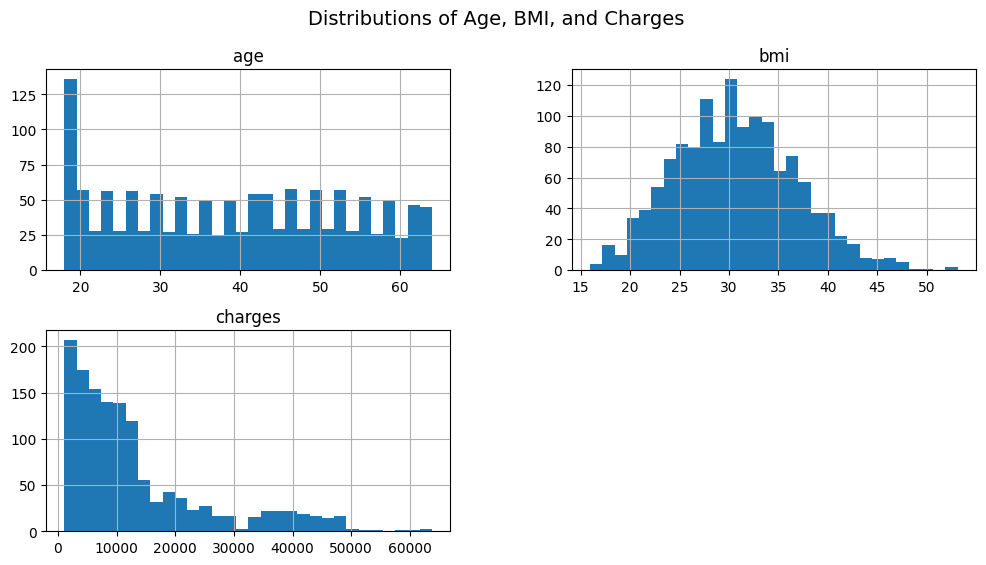

In [11]:
# Histograms for numeric columns
df[['age', 'bmi', 'charges']].hist(bins=30, figsize=(12,6))
plt.suptitle("Distributions of Age, BMI, and Charges", fontsize=14)
plt.show()

#### Categorical Variables

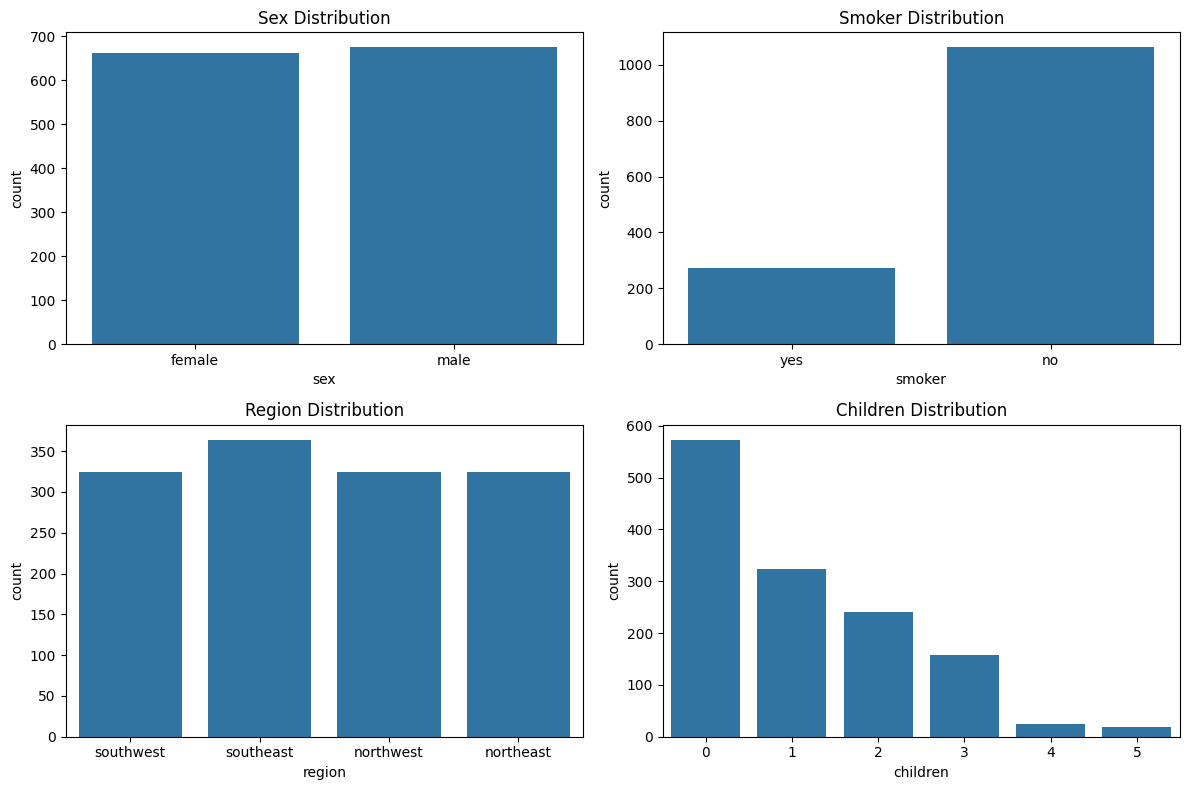

In [12]:
# Count plots for categorical features
fig, axes = plt.subplots(2, 2, figsize=(12,8))

sns.countplot(data=df, x="sex", ax=axes[0,0])
axes[0,0].set_title("Sex Distribution")

sns.countplot(data=df, x="smoker", ax=axes[0,1])
axes[0,1].set_title("Smoker Distribution")

sns.countplot(data=df, x="region", ax=axes[1,0])
axes[1,0].set_title("Region Distribution")

sns.countplot(data=df, x="children", ax=axes[1,1])
axes[1,1].set_title("Children Distribution")

plt.tight_layout()
plt.show()

#### Bivariate Analysis (Features vs Charges)

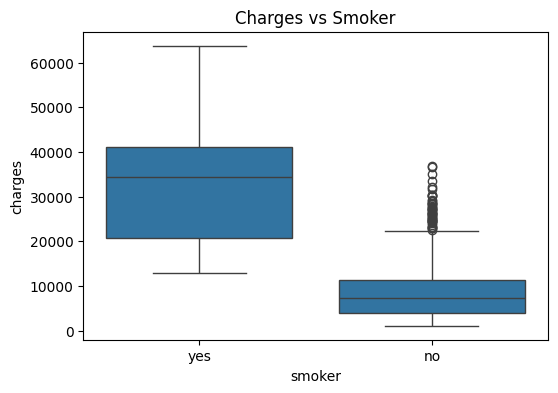

In [13]:
# Charges by smoker status
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="smoker", y="charges")
plt.title("Charges vs Smoker")
plt.show()

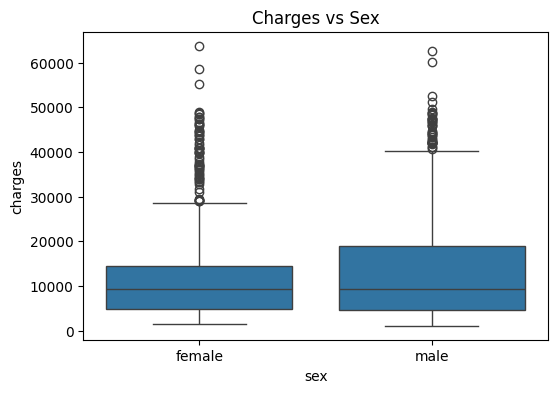

In [15]:
# Charges by sex
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="sex", y="charges")
plt.title("Charges vs Sex")
plt.show()

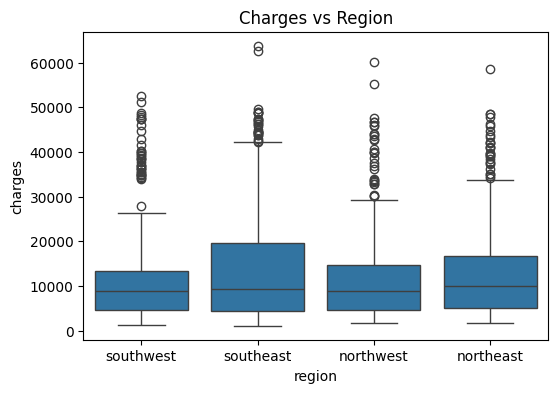

In [16]:
# Charges by region
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="region", y="charges")
plt.title("Charges vs Region")
plt.show()

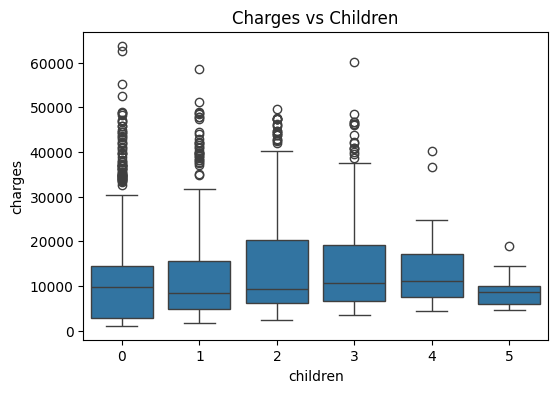

In [17]:
# Charges by number of children
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="children", y="charges")
plt.title("Charges vs Children")
plt.show()

#### Correlation Analysis

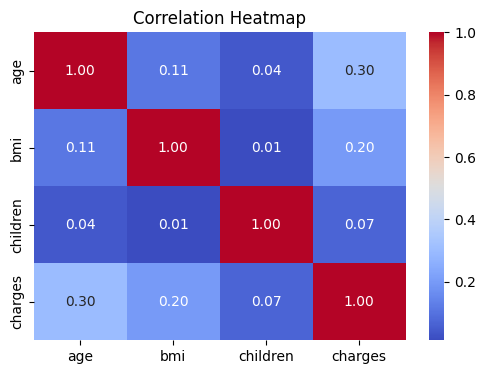

In [49]:
# Correlation matrix
corr = df[['age', 'bmi', 'children', 'charges']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

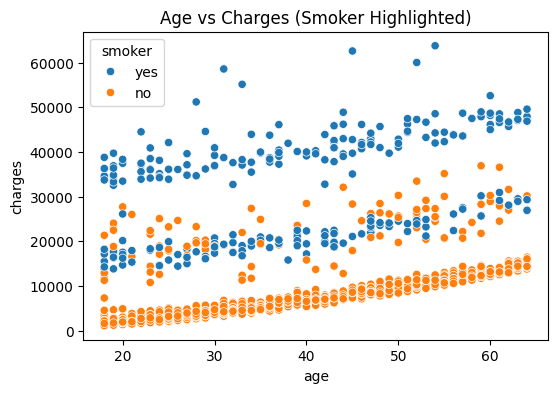

In [50]:
# Scatterplot: Age vs Charges
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="age", y="charges", hue="smoker")
plt.title("Age vs Charges (Smoker Highlighted)")
plt.show()

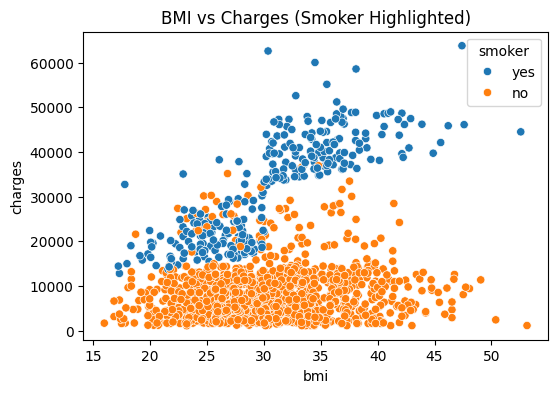

In [51]:
# Scatterplot: BMI vs Charges
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="bmi", y="charges", hue="smoker")
plt.title("BMI vs Charges (Smoker Highlighted)")
plt.show()